In [26]:
import numpy as np
import pandas as pd

In [2]:
from tensorflow.keras.datasets import reuters

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\Dell\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


# Exploring Data

In [4]:
print(len(train_data))
print(train_data[0])
len(train_data[8981])

8982
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


105

In [5]:
print(len(train_labels))
train_labels

8982


array([ 3,  4,  3, ..., 25,  3, 25], dtype=int64)

# Decoding News Wire Back to text

In [6]:
word_index = reuters.get_word_index()
#print(word_index)
len(word_index.keys())

30979

In [7]:
#print(word_index.items())
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])
#reverse_word_index
len(word_index.items())

30979

In [8]:
decoded_newswire = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[3]]) 
decoded_newswire

"? the farmers home administration the u s agriculture department's farm lending arm could lose about seven billion dlrs in outstanding principal on its severely ? borrowers or about one fourth of its farm loan portfolio the general accounting office gao said in remarks prepared for delivery to the senate agriculture committee brian crowley senior associate director of gao also said that a preliminary analysis of proposed changes in ? financial eligibility standards indicated as many as one half of ? borrowers who received new loans from the agency in 1986 would be ? under the proposed system the agency has proposed evaluating ? credit using a variety of financial ratios instead of relying solely on ? ability senate agriculture committee chairman patrick leahy d vt ? the proposed eligibility changes telling ? administrator ? clark at a hearing that they would mark a dramatic shift in the agency's purpose away from being farmers' lender of last resort toward becoming a big city bank but

In [9]:
train_labels[3]

4

# Encoding the Data

In [10]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

In [11]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)
print("training Data after one hot encoding:",x_train)
print("testing Data after one hot encoding:",x_test)

training Data after one hot encoding: [[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]
testing Data after one hot encoding: [[0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]]


In [12]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels),dimension))
    for i,label in enumerate(labels):
        results[i,label] = 1
    return results

In [21]:
one_hot_train_labels=to_one_hot(train_labels)
one_hot_test_labels=to_one_hot(test_labels)
print(train_labels[0])
#Firstly Train labels[0] was 3 , and after one hot encoding train_label[0] looks like as follows 
#len(one_hot_train_labels[0])
one_hot_train_labels[0]

3


array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

# Model Defination

In [35]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential ()
model.add(layers.Dense(64, activation = 'relu', input_shape=(10000,)))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(46,activation = 'softmax'))

# Compiling The model 

In [36]:
model.compile(optimizer= 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Seprating The validation Data

In [44]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

# Training The Model

In [45]:
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512, validation_data = (x_val,y_val))

Epoch 1/20
16/16 [==============================] - 4s 171ms/step - loss: 3.1671 - accuracy: 0.4121 - val_loss: 1.7630 - val_accuracy: 0.6340
Epoch 2/20
16/16 [==============================] - 1s 65ms/step - loss: 1.5317 - accuracy: 0.6858 - val_loss: 1.2910 - val_accuracy: 0.7020
Epoch 3/20
16/16 [==============================] - 1s 59ms/step - loss: 1.0668 - accuracy: 0.7697 - val_loss: 1.1264 - val_accuracy: 0.7510
Epoch 4/20
16/16 [==============================] - 1s 57ms/step - loss: 0.8589 - accuracy: 0.8166 - val_loss: 1.0253 - val_accuracy: 0.7870
Epoch 5/20
16/16 [==============================] - 1s 61ms/step - loss: 0.6741 - accuracy: 0.8568 - val_loss: 0.9623 - val_accuracy: 0.8150
Epoch 6/20
16/16 [==============================] - 1s 71ms/step - loss: 0.5426 - accuracy: 0.8913 - val_loss: 0.9029 - val_accuracy: 0.8240
Epoch 7/20
16/16 [==============================] - 2s 132ms/step - loss: 0.4306 - accuracy: 0.9093 - val_loss: 0.8983 - val_accuracy: 0.8190
Epoch 8/20


In [46]:
history.history

{'loss': [2.6747870445251465,
  1.4214516878128052,
  1.0495994091033936,
  0.8275419473648071,
  0.6594718098640442,
  0.5262319445610046,
  0.42214328050613403,
  0.3435012698173523,
  0.28511881828308105,
  0.24422168731689453,
  0.21026432514190674,
  0.1824886053800583,
  0.16916397213935852,
  0.15669722855091095,
  0.13729141652584076,
  0.13504520058631897,
  0.12654465436935425,
  0.122167207300663,
  0.11654888838529587,
  0.11432862281799316],
 'accuracy': [0.5189175605773926,
  0.7048358917236328,
  0.7748684287071228,
  0.8258581757545471,
  0.8618140816688538,
  0.891004741191864,
  0.9113004207611084,
  0.927837610244751,
  0.9383612871170044,
  0.943748414516449,
  0.9476321935653687,
  0.9525181651115417,
  0.9531445503234863,
  0.9533951282501221,
  0.9545226693153381,
  0.9543973803520203,
  0.9564018845558167,
  0.957028329372406,
  0.9579052925109863,
  0.9569030404090881],
 'val_loss': [1.7630385160446167,
  1.2910104990005493,
  1.126394271850586,
  1.02530336380

#  Plotting the Training & Validation Loss

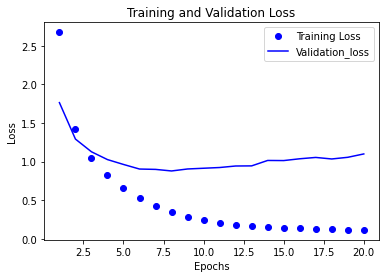

In [49]:
import matplotlib.pyplot as plt
loss= history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, validation_loss, 'b', label = 'Validation_loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#  Plotting The Training and Validation Accuracy

In [51]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

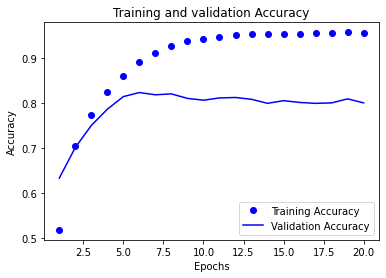

In [54]:
plt.clf()
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1, len(loss)+1)
plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, validation_accuracy, 'b', label = 'Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Retraining the model From Scratch

In [63]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation= 'softmax'))

model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs = 9, batch_size = 512, validation_data = (x_val, y_val))

Epoch 1/9
16/16 [==============================] - 3s 116ms/step - loss: 3.1484 - accuracy: 0.4051 - val_loss: 1.7478 - val_accuracy: 0.6380
Epoch 2/9
16/16 [==============================] - 1s 65ms/step - loss: 1.5128 - accuracy: 0.6920 - val_loss: 1.3067 - val_accuracy: 0.6950
Epoch 3/9
16/16 [==============================] - 1s 68ms/step - loss: 1.0737 - accuracy: 0.7705 - val_loss: 1.1458 - val_accuracy: 0.7310
Epoch 4/9
16/16 [==============================] - 1s 60ms/step - loss: 0.8609 - accuracy: 0.8187 - val_loss: 1.0208 - val_accuracy: 0.7770
Epoch 5/9
16/16 [==============================] - 1s 56ms/step - loss: 0.6795 - accuracy: 0.8588 - val_loss: 0.9678 - val_accuracy: 0.7840
Epoch 6/9
16/16 [==============================] - 1s 92ms/step - loss: 0.5323 - accuracy: 0.8946 - val_loss: 0.9165 - val_accuracy: 0.8070
Epoch 7/9
16/16 [==============================] - 1s 65ms/step - loss: 0.4215 - accuracy: 0.9127 - val_loss: 0.8873 - val_accuracy: 0.8090
Epoch 8/9
16/16 [==

In [65]:
results = model.evaluate(x_test, one_hot_test_labels)
results

71/71 [==============================] - 0s 3ms/step - loss: 0.9877 - accuracy: 0.7876


[0.9876559972763062, 0.7876224517822266]

In [86]:
print("test labels:", test_labels)
print("length of test labels:",len(test_labels))
import copy
test_labels_copy = copy.copy(test_labels)
print("test_labels after copying are:",test_labels_copy)
print("Length of test labels after copying:",len(test_labels_copy))
np.random.shuffle(test_labels_copy) # Shuffeling the labels randomly
hits_array = np.array(test_labels) == np.array(test_labels_copy)
print(hits_array)  
print("length of hits_array:",len(hits_array))
print("Sum of hits_array:",np.sum(hits_array))
float(np.sum(hits_array) / len(test_labels))

test labels: [ 3 10  1 ...  3  3 24]
length of test labels: 2246
test_labels after copying are: [ 3 10  1 ...  3  3 24]
Length of test labels after copying: 2246
[False False  True ...  True  True False]
length of hits_array: 2246
Sum of hits_array: 423


0.18833481745325023

# Generating Predictions for new Data

In [112]:
predictions = model.predict(x_test)
#print(predictions)
#print(predictions.shape)
print("length of predictions:",len(predictions))
#print(len(predictions[0]))
#print(predictions[0].sum())
#print(predictions[0].shape)
np.argmax(predictions[0])

length of predictions: 2246


3